In [1]:
#테스트와 훈련을 동일시 한 문제로 인하여 이를 분리하여 사용해야 함.
# bit.ly/bream_smelt
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
#2차원 리스트로 변경 후 타겟도 정함
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [5]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [8]:
# 처음 35개를 훈련으로 나머지 14개는 테스트로 하기 위한 슬라이싱
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [9]:
# train 데이터 훈련 및 테스트
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

In [10]:
#numpy를 통해서 고차원의 형태로 변경하는 방법을 배우기
import numpy as np

In [12]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

#print(input_arr)
#배열의 형태를 알려주는 shape 속성
print(input_arr.shape)
# (49, 2) --> (샘플 수 , 특성 수)  --> 샘플 수 (행), 2개의 특성(열)

(49, 2)


In [23]:
#넘파이 arrange() 함수를 사용하면 0~48까지 1씩 증가하는 인덱스를 간단히 만들 수 있음
# random seed를 특정하게 만들어서 매번 같은 형태의 데이터를 갖도록 함. 여기서는 42번을 선택
np.random.seed(42)
index = np.arange(49)
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [24]:
#shuffle을 통해서 생성된 index를 섞어줌
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [25]:
#index는 한 번에 여러개의 원소를 선택할 수 있음. (배열인덱싱은)
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


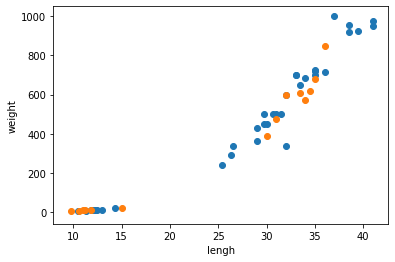

In [28]:
# 현재 train과 test가 어떻게 분포되었는지를 살펴볼것
import matplotlib.pyplot as plt
# train_input[:,0] 의미는 ,0는 모든 열 0번째를 말함. 즉, length, ,1은 weight
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(test_input[:,0], test_input[:, 1])
plt.xlabel("lengh")
plt.ylabel("weight")
plt.show()

In [29]:
kn = kn.fit(train_input, train_target)

In [30]:
kn.score(test_input, test_target)

1.0

In [31]:
kn.predict(test_input) #input에 대한 결과를 나타내고 이를 test_target과 생각하면 결과를 알 수 있음

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [33]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [34]:
## 데이터 전처리
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [35]:
# 넘파이를 이용해서 간단하게 구성
import numpy as np

In [44]:
fish_data = np.column_stack((fish_length, fish_weight))
# [ [first, second], [first, second]]와 같은 형태로 변경됨.
#fish_data

In [45]:
# np_zero, np_one() 원하는 개수의 1과 0을 채운 배열을 만든ㄹ어 줌
# np.concatenate() 연달아 두 배열을 합침

fish_target = np.concatenate((np.ones(35), np.zeros(14)))
#fish_target

In [46]:
#train과 test 함수를 나누기 

from sklearn.model_selection import train_test_split

#train_test_split 는 기본저으노 25%를 따로 떼어서 test로 만듦

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [47]:
#shape를 통해서 어떻게 나누었는지를 판별하기
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [48]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [49]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [50]:
#fish 에대한 비율이 2.5:1이라거 원래 샘플에서 나타내었던 3.3:1에 맞게 변경
# stratify 변수를 지정
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [51]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [52]:
#kn을 이용하여 훈련하기
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


1.0

In [53]:
kn.predict([[25,150]])
# 값이 1이면 도미, 0이면 방어 그런데 값은 방어로 나타냄 밑에 그림에서 도미에 가깝지만 결과는 0 방어로 나타남

array([0.])

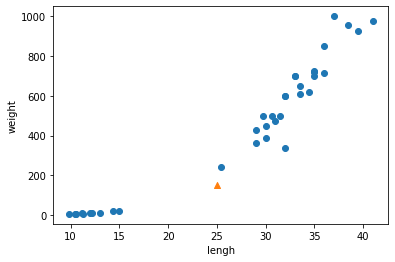

In [54]:
#크기가 큰 빙어가존재하는 것일까? 그래프로 이를 비교하기
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker="^")
plt.xlabel("lengh")
plt.ylabel("weight")
plt.show()

In [58]:
#이웃까지의 거리를 나타내는 함수를 써봄. kneighbors()
# 이웃들은 기본적으로 5개를 돌러보냄
distance, indexes = kn.kneighbors([[25, 150]])

In [59]:
print(distance)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


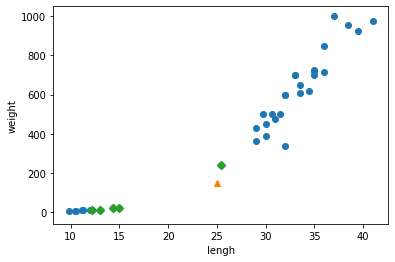

In [62]:
import matplotlib.pyplot as plt
# distance와 indexes들의 위치를 그림으로 알아내기

plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker="^")
# indexes를 갖는 train_input 중에서 이를 각각 나타냄. 
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker="D")
plt.xlabel("lengh")
plt.ylabel("weight")
plt.show()

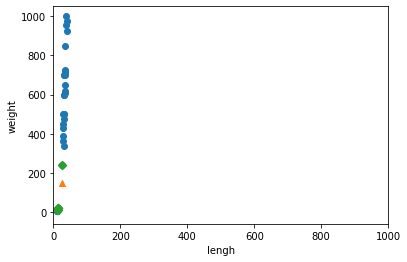

In [63]:
#실제 그래프상에서 x축은 좁고 y축은 길기 때문에 위로 올라갈수록 거리는 더 늘어나게 되어있음 따라서 그래프를 같게 표시해야 알 수있음.
import matplotlib.pyplot as plt
# distance와 indexes들의 위치를 그림으로 알아내기

plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker="^")
# indexes를 갖는 train_input 중에서 이를 각각 나타냄. 
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker="D")
plt.xlim((0,1000)) #x축의 범위를 y축과 맞춤
plt.xlabel("lengh")
plt.ylabel("weight")
plt.show()

In [67]:
#위와 같은 현상은 무게가 100단위 길이는 10 단위로 단순히 길이만으로 계산하면 안되기 때문에 같은 scale로 맞춰야 함. 
# 넘파이에서 생각하는 방법 axis = 0로 설정하면 행을 따라 각 열의 통계 값을 게산 axis = 1로 하면 열을따라 행의 통계값을 게산
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [70]:
# scale되는 값은 평균을 빼주고 표준편차로 나눠주면 된다. 
train_scaled = (train_input - mean) / std
#train_scaled

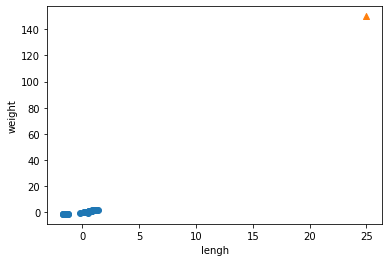

In [71]:
# 팀장이 나타내었던 값을 다시 산점도로 나타내기
import matplotlib.pyplot as plt
# distance와 indexes들의 위치를 그림으로 알아내기

plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(25, 150, marker="^")
# indexes를 갖는 train_input 중에서 이를 각각 나타냄. 
plt.xlabel("lengh")
plt.ylabel("weight")
plt.show()

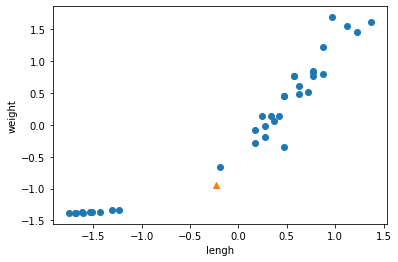

In [73]:
#주어진 값 25, 150이 scaled 되어있지 않기 때문에 이렇게 발생함. 
# 팀장이 나타내었던 값을 다시 산점도로 나타내기
import matplotlib.pyplot as plt
# distance와 indexes들의 위치를 그림으로 알아내기

new = ([25, 150] - mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker="^")
# indexes를 갖는 train_input 중에서 이를 각각 나타냄. 
plt.xlabel("lengh")
plt.ylabel("weight")
plt.show()

In [74]:
#위와 같이 이전 그래프와 같음 하지만 다시 훈련을 해봐야 겠지요
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
#test 도 scaled가 되어야 함. 함. 
test_scaled = (test_input - mean)/std
kn.score(test_scaled, test_target)

1.0

In [78]:
print(kn.predict([new]))

[1.]


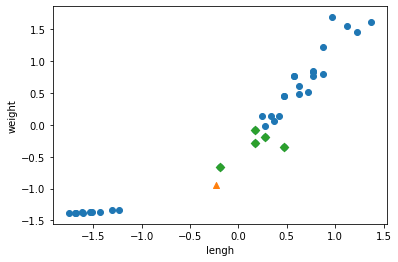

In [79]:
#이를 통해서 다시 거리에 맞게 추출해 보기

distance , indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker="^")
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker="D")
plt.xlabel("lengh")
plt.ylabel("weight")
plt.show()